In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=ImportWarning)

In [11]:
datos = pd.read_csv('/content/drive/MyDrive/df/ventasvalores.csv')

In [12]:
datos.head()

,Unnamed: 0,tv,radio,periodico,ventas
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [4]:
datos.describe()

,Unnamed: 0,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,0.000000,0.700000,0.000000,0.300000,1.600000
25%,49.750000,74.375000,9.975000,12.750000,10.375000
50%,99.500000,149.750000,22.900000,25.750000,12.900000
75%,149.250000,218.825000,36.525000,45.100000,17.400000
max,199.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   tv          200 non-null    float64
 2   radio       200 non-null    float64
 3   periodico   200 non-null    float64
 4   ventas      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
datos.drop(columns=['Unnamed: 0'], inplace=True)

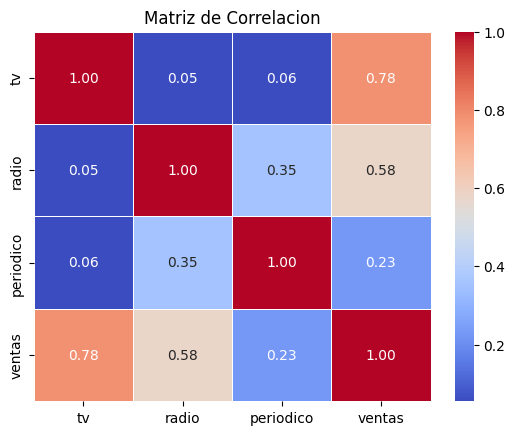

In [7]:
## Matriz de correlacion
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = datos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlacion')
plt.show()


Relacion de Variables

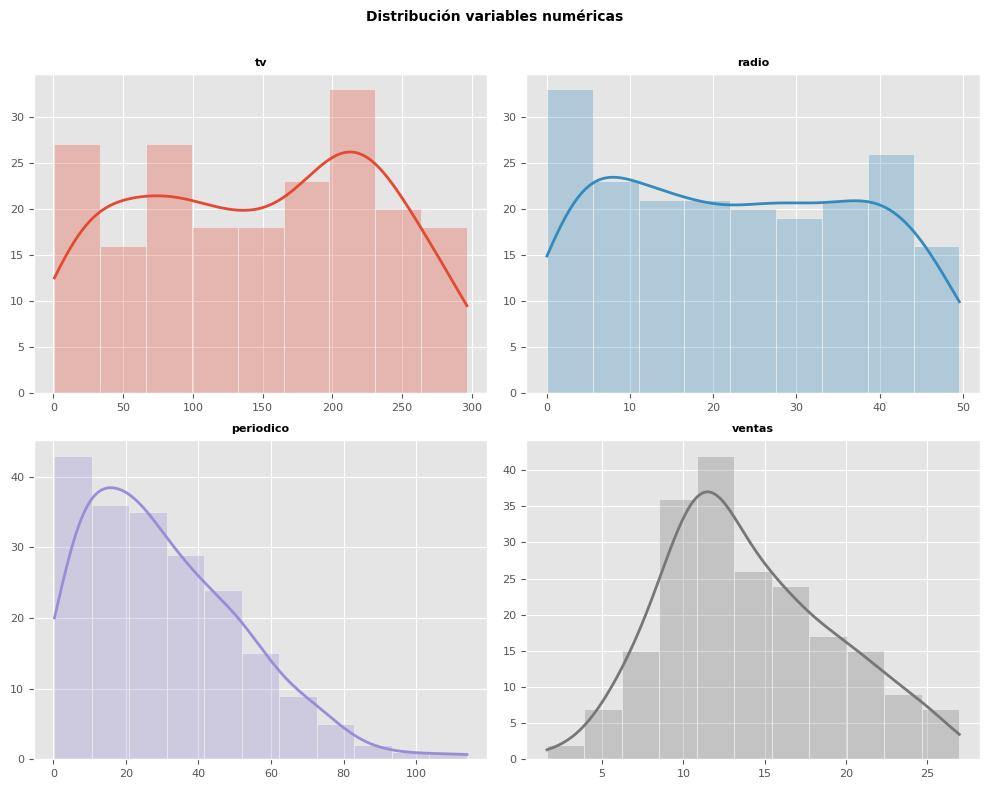

In [15]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10, 'lines.linewidth': 1.5})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle']) * 2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

AJUSTE DEL MODELO

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
datos[['tv','radio','periodico','ventas']]= scaler.fit_transform(datos[['tv','radio','periodico','ventas']])

In [16]:
display(datos)

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
from sklearn.model_selection import train_test_split
X= datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train, prepend = True)
X_test = sm.add_constant(X_test, prepend = True)

In [20]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [21]:
# Obtener coeficientes y el intercepto
print("Intercepto (β₀):", modelo.intercept_)
print("Coeficientes (β1, β2, ...):", modelo.coef_)

Intercepto (β₀): 2.9790673381226327
Coeficientes (β1, β2, ...): [0.         0.04472952 0.18919505 0.00276111]


In [22]:
y_pred = modelo.predict(X_test)
r2= r2_score(y_test, y_pred)
print('R2:', r2)

R2: 0.8994380241009119


In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 1.7815996615334508


VISUALIZACION

In [25]:
y_pred_train = modelo.predict(X_train)
residuos_train= y_train - y_pred_train
residuos_train

,ventas
79,1.311725
197,0.126623
38,0.044667
24,1.499898
122,-1.895621
...,...
106,0.939544
14,0.540110
92,0.182377
179,0.273178


Text(0, 0.5, 'Residuo')

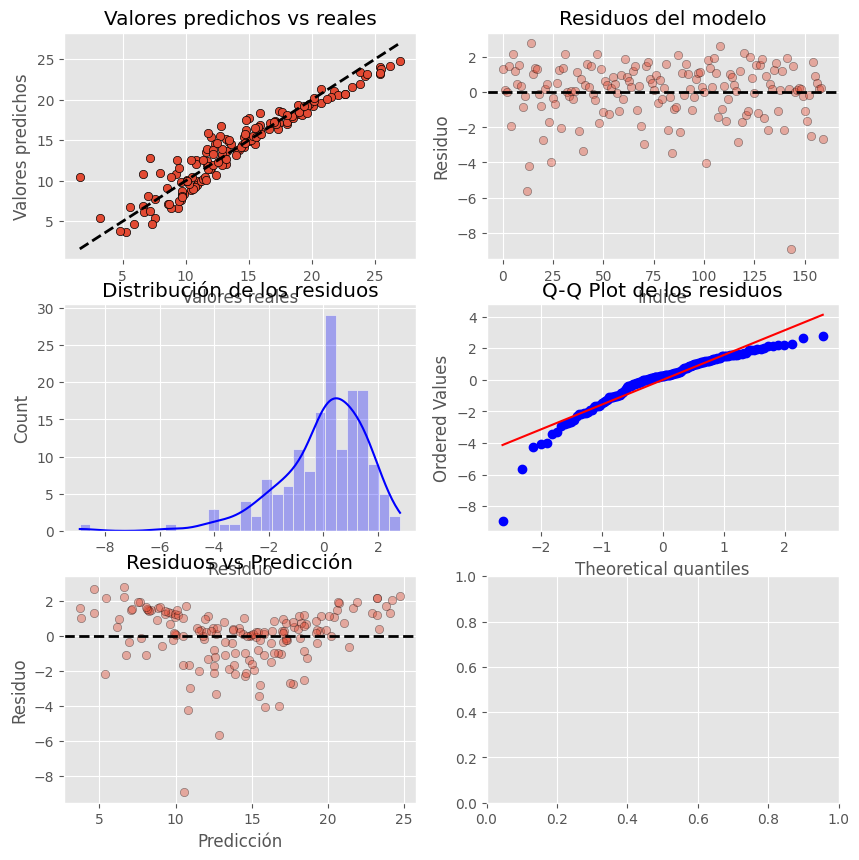

In [26]:
import seaborn as sns
from scipy.stats  import probplot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

#1 Grafico de valores predichos vs reales
axes[0,0].scatter(y_train, y_pred_train, edgecolors=(0,0,0))
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0,0].set_xlabel('Valores reales')
axes[0,0].set_ylabel('Valores predichos')
axes[0,0].set_title('Valores predichos vs reales')

#2 Residuos vs Indices
axes[0, 1].scatter(range(len(y_train)), residuos_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo')
axes[0, 1].set_xlabel('Índice')
axes[0, 1].set_ylabel('Residuo')

#3. Histograma de residuos
sns.histplot(residuos_train, kde=True, bins=30, ax=axes[1, 0], color="blue", alpha=0.3)
axes[1, 0].set_title('Distribución de los residuos')
axes[1, 0].set_xlabel('Residuo')

# 4. Gráfico Q-Q de los residuos
probplot(residuos_train, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de los residuos')

# 5. Residuos vs Predicción
axes[2, 0].scatter(y_pred_train, residuos_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos vs Predicción')
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')

PRUEBAS

In [27]:
nuevos_datos = np.array([[230, 38, 69,3],  # Ejemplo 1 con 4 características
                         [151, 45,100,3],  # Ejemplo 2 con 4 características
                         [60, 42, 58,3]])  # Ejemplo 3 con 4 características

In [28]:
predicciones_nuevas = modelo.predict(nuevos_datos)
print(predicciones_nuevas)

[17.74153109 23.91968439 15.83930356]


In [29]:
for i, pred in enumerate(predicciones_nuevas):
    print(f"Predicción para el ejemplo {i + 1}: {pred:.2f}")

Predicción para el ejemplo 1: 17.74
Predicción para el ejemplo 2: 23.92
Predicción para el ejemplo 3: 15.84


In [30]:
coeficientes =modelo.coef_
variables = ['radio','tv','periodico']

In [31]:
print(f"Variables: {variables}")
print(f"Coeficientes: {coeficientes}")
print(f"Tamaños - Variables: {len(variables)}, Coeficientes: {len(coeficientes)}")

Variables: ['radio', 'tv', 'periodico']
Coeficientes: [0.         0.04472952 0.18919505 0.00276111]
Tamaños - Variables: 3, Coeficientes: 4


In [32]:
importancia = abs(coeficientes[1:]) / abs(coeficientes[1:]).sum() * 100
importancia

array([18.89827738, 79.93514834,  1.16657428])

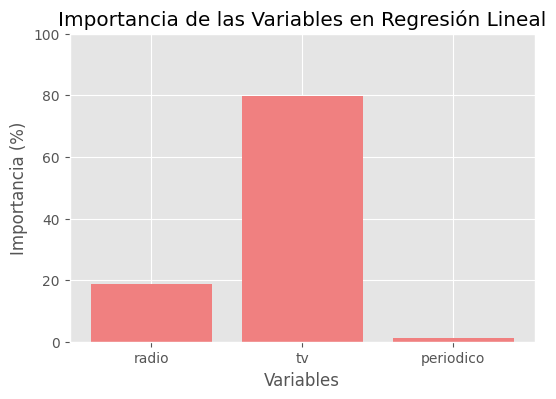

In [33]:
# Graficar importancia de las variables
plt.figure(figsize=(6, 4))
plt.bar(variables, importancia, color='lightcoral')
plt.xlabel('Variables')
plt.ylabel('Importancia (%)')
plt.title('Importancia de las Variables en Regresión Lineal')
plt.ylim(0, 100)  # Escalar el eje Y a 100%
plt.show()